# k_nearest 

In [4]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [5]:
data = pd.read_csv("networkadds.csv")
data.head(3)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0


In [6]:
data.drop(columns= ["User ID","Gender"],inplace=True)

In [7]:
data

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


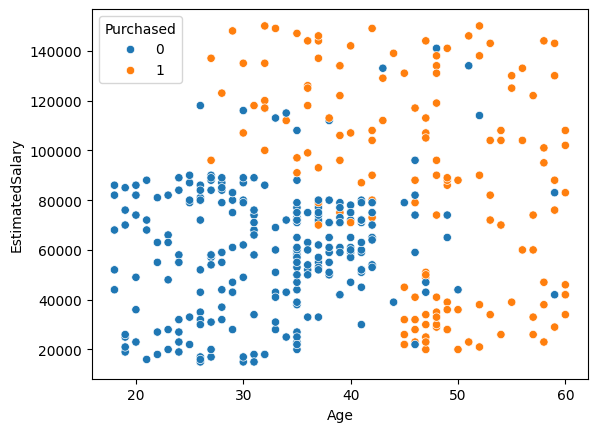

In [8]:
sns.scatterplot(x = "Age",y = "EstimatedSalary",data= data,hue = "Purchased")
plt.show()

In [9]:
data.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [10]:
x = data.iloc[:,:-1]
y = data["Purchased"]

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
sc = StandardScaler()

In [13]:
sc.fit(x)

StandardScaler()

In [1]:
array = sc.transform(x)
array

In [15]:
x = pd.DataFrame(array,columns=x.columns)
x

,Age,EstimatedSalary
0,-1.781797,-1.490046
1,-0.253587,-1.460681
2,-1.113206,-0.785290
3,-1.017692,-0.374182
4,-1.781797,0.183751
...,...,...
395,0.797057,-0.844019
396,1.274623,-1.372587
397,1.179110,-1.460681
398,-0.158074,-1.078938


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.2,random_state=42)

# k_nearest_neighbour 

In [18]:
from sklearn.neighbors import KNeighborsClassifier # we use classifier bcz output is classified in nature and in 01 form 

In [24]:
kc = KNeighborsClassifier(n_neighbors= 17,p=2 ) # n_neighbours mean how much neighbours to see p mean knn types  

In [25]:
kc.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=17)

In [26]:
kc.score(x_test,y_test) ,kc.score(x_train,y_train) 

(0.853125, 0.85)

In [27]:
for i in range(1,20): # used to find the best n_neighbours value 
    kc =  KNeighborsClassifier(n_neighbors= i)
    kc.fit(x_train,y_train)
    print(kc.score(x_train,y_train)*100,kc.score(x_test,y_test)*100,i)

100.0 82.8125 1
88.75 77.8125 2
88.75 89.375 3
86.25 90.3125 4
86.25 92.5 5
85.0 91.875 6
86.25 92.5 7
86.25 91.5625 8
86.25 92.8125 9
87.5 91.25 10
86.25 91.5625 11
87.5 90.625 12
87.5 90.9375 13
87.5 86.875 14
87.5 86.875 15
83.75 84.6875 16
85.0 85.3125 17
80.0 81.5625 18
80.0 82.8125 19


In [34]:
kc.predict([[0.797057,-0.844019]])

C:\Users\R c\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0])

In [30]:
x,y

(          Age  EstimatedSalary
 0   -1.781797        -1.490046
 1   -0.253587        -1.460681
 2   -1.113206        -0.785290
 3   -1.017692        -0.374182
 4   -1.781797         0.183751
 ..        ...              ...
 395  0.797057        -0.844019
 396  1.274623        -1.372587
 397  1.179110        -1.460681
 398 -0.158074        -1.078938
 399  1.083596        -0.990844
 
 [400 rows x 2 columns],
 0      0
 1      0
 2      0
 3      0
 4      0
       ..
 395    1
 396    1
 397    1
 398    0
 399    1
 Name: Purchased, Length: 400, dtype: int64)

In [35]:
from mlxtend.plotting import plot_decision_regions

C:\Users\R c\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


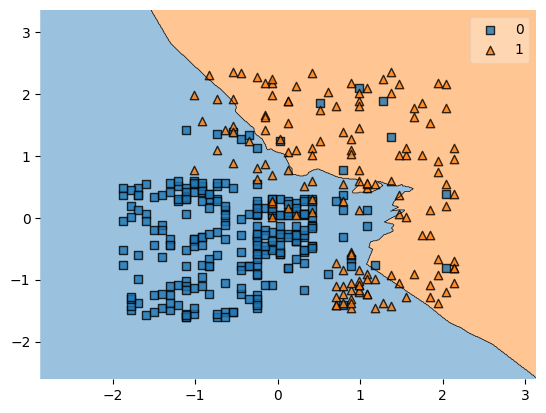

In [38]:
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf = kc)
plt.show()

# knearest neighbour regression point of view

In [39]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [40]:
data = pd .read_csv("employee_salary.csv")
data.head(3)

,Age,Experience,Salary
0,50,1,56719.30305
1,36,14,59632.24081
2,29,3,40319.43262


In [41]:
data.isnull().sum()

Age           0
Experience    0
Salary        1
dtype: int64

In [43]:
data["Salary"].fillna(data["Salary"].mean())

0      56719.303050
1      59632.240810
2      40319.432620
3      56195.813580
4      45877.545210
           ...     
96     95740.098720
97     86357.151260
98     90777.506280
99     58154.338200
100    67788.259624
Name: Salary, Length: 101, dtype: float64

In [44]:
data.isnull().sum()

Age           0
Experience    0
Salary        0
dtype: int64

In [45]:
x = data.iloc[:,:-1]
y = data["Salary"]

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.2,random_state=42)

In [48]:
from sklearn.neighbors import KNeighborsRegressor

In [64]:
KNR = KNeighborsRegressor(n_neighbors=5)

In [65]:
KNR.fit(x_train,y_train)

KNeighborsRegressor()

In [66]:
KNR.score(x_test,y_test)

0.8136221850441336